## 6.5 Unsupervised Machine Learning - Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Cleaning Data
#### 3. The elbow technique
#### 4. k-means clustering
#### 5. Descriptive statistics for clusters

### 1. Importing libraries and data and renaming columns

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
from sklearn.preprocessing import StandardScaler

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\Lukman\Desktop\FEMINA CF\Data Immerssion\Achievement6\Analyzing Flight Delays'

In [4]:
# Import Data

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','flightdelay_cleaned.csv'))

In [5]:
df.shape

(2920058, 28)

### 2. cleaning data

In [6]:
# Drop categorical columns
categorical_columns = ['Unnamed: 0', 'Flight_Date', 'Airline', 'Airline_DOT_Code', 'Airline_Code', 'Flight_Number', 'Origin_Airport', 'Origin_City', 'Destination_Airport', 'Destination_City', 'Cancellation_Code']
df_numeric = df.drop(columns=categorical_columns)

# Display the numeric dataframe
df_numeric.head()


,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay,Cancelled,Diverted,Scheduled_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay
0,1155,1151.0,-4.0,1501,1447.0,-14.0,0.0,0.0,186.0,176.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0
1,2120,2114.0,-6.0,2315,2310.0,-5.0,0.0,0.0,235.0,236.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0
2,954,1000.0,6.0,1252,1252.0,0.0,0.0,0.0,118.0,112.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0
3,1609,1608.0,-1.0,1829,1853.0,24.0,0.0,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,1840,1838.0,-2.0,2041,2040.0,-1.0,0.0,0.0,181.0,182.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0


In [12]:
df_numeric.columns

Index(['Scheduled_Departure_Time', 'Actual_Departure_Time', 'Departure_Delay',
       'Scheduled_Arrival_Time', 'Actual_Arrival_Time', 'Arrival_Delay',
       'Cancelled', 'Diverted', 'Scheduled_Elapsed_Time',
       'Actual_Elapsed_Time', 'Air_Time', 'Distance', 'Carrier_Delay',
       'Weather_Delay', 'NAS_Delay', 'Security_Delay', 'Late_Aircraft_Delay'],
      dtype='object')

### Standardize the data to ensure that all variables are on the same scale.

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)


### 3. The elbow technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-46720927.99999851,
 -39228484.19468894,
 -33024236.607365448,
 -28809135.51421751,
 -25897355.442384705,
 -24507643.183857497,
 -22215051.702810604,
 -20403467.42956534,
 -19234761.577138543]

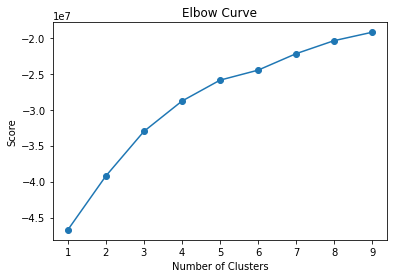

In [14]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score, marker='o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on the elbow curve, k = 4 appears to be a good choice for the number of clusters. This is because the curve shows a noticeable change in the slope around this point, indicating that four clusters are sufficient to capture the underlying structure in the data without overfitting.

### 4. k-means clustering

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

KMeans(n_clusters=4)

In [17]:
df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

In [18]:
df_scaled.head()

,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay,Cancelled,Diverted,Scheduled_Elapsed_Time,Actual_Elapsed_Time,Air_Time,Distance,Carrier_Delay,Weather_Delay,NAS_Delay,Security_Delay,Late_Aircraft_Delay,clusters
0,-0.352408,-0.357839,-0.286643,0.021589,-0.036686,-0.356725,0.0,-0.046336,0.606935,0.550466,0.584436,0.430722,-0.140815,-0.052254,-0.15977,-0.017408,-0.180515,0
1,1.635305,1.570959,-0.327357,1.614750,1.585988,-0.180678,0.0,-0.046336,1.289933,1.388418,1.101049,0.997291,-0.140815,-0.052254,-0.15977,-0.017408,-0.180515,2
2,-0.766428,-0.660277,-0.083073,-0.465753,-0.403339,-0.082874,0.0,-0.046336,-0.340899,-0.343350,-0.362687,-0.222359,-0.140815,-0.052254,-0.15977,-0.017408,-0.180515,0
3,0.582744,0.557489,-0.225572,0.663551,0.726704,0.386586,0.0,-0.046336,1.638401,2.072746,1.962071,1.319591,-0.140815,-0.052254,1.43338,-0.017408,-0.180515,2
4,1.058559,1.018157,-0.245929,1.078477,1.078314,-0.102435,0.0,-0.046336,0.537241,0.634261,0.584436,0.295017,-0.140815,-0.052254,-0.15977,-0.017408,-0.180515,1


In [19]:
df_scaled['clusters'].value_counts()

0    1232137
1    1185314
2     441694
3      60913
Name: clusters, dtype: int64

### Create Visualizations of the Clustered Data

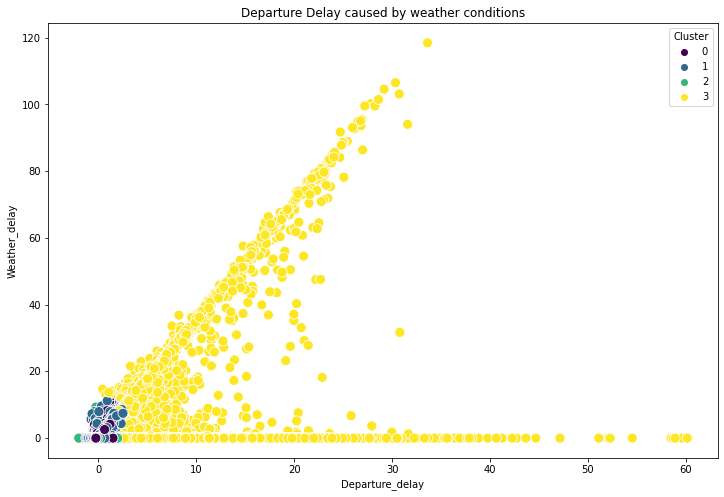

<Figure size 432x288 with 0 Axes>

In [22]:
# Plotting the clusters of departure delay and weather delay
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_scaled, x='Departure_Delay', y='Weather_Delay', hue='clusters', palette='viridis', s=100)
plt.title('Departure Delay caused by weather conditions')
plt.xlabel('Departure_delay')
plt.ylabel('Weather_delay')
plt.legend(title='Cluster')
plt.show()

# Export the scatterplot of clusters
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'Departure_weather_delay_clustering.png')
plt.savefig(file_name)

The significant size of Cluster 3 indicates that weather is a major cause of departure delays for many flights.

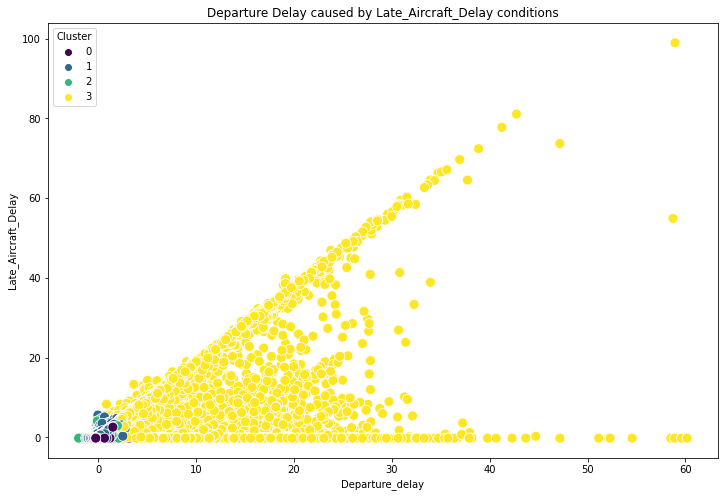

<Figure size 432x288 with 0 Axes>

In [23]:
# Plotting the clusters of departure delay and Late_Aircraft_Delay
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_scaled, x='Departure_Delay', y='Late_Aircraft_Delay', hue='clusters', palette='viridis', s=100)
plt.title('Departure Delay caused by Late_Aircraft_Delay conditions')
plt.xlabel('Departure_delay')
plt.ylabel('Late_Aircraft_Delay')
plt.legend(title='Cluster')
plt.show()

# Export the scatterplot of clusters
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'Departure_Late_Aircraft_delay_clustering.png')
plt.savefig(file_name)

The significant size of Cluster 3 highlights that late aircraft is a major cause of departure delays for many flights.

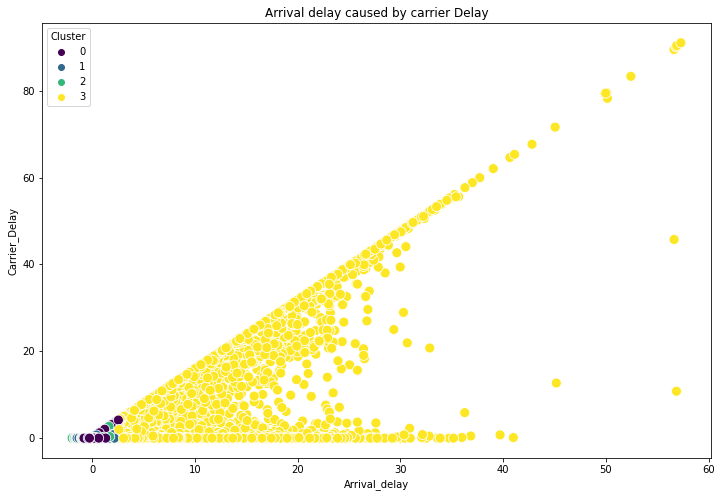

<Figure size 432x288 with 0 Axes>

In [26]:
# Plotting the clusters of Arrival delay and carrier Delay
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_scaled, x='Arrival_Delay', y='Carrier_Delay', hue='clusters', palette='viridis', s=100)
plt.title('Arrival delay caused by carrier Delay')
plt.xlabel('Arrival_delay')
plt.ylabel('Carrier_Delay')
plt.legend(title='Cluster')
plt.show()

# Export the scatterplot of clusters
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'Arrival_carrier_delay_clustering.png')
plt.savefig(file_name)

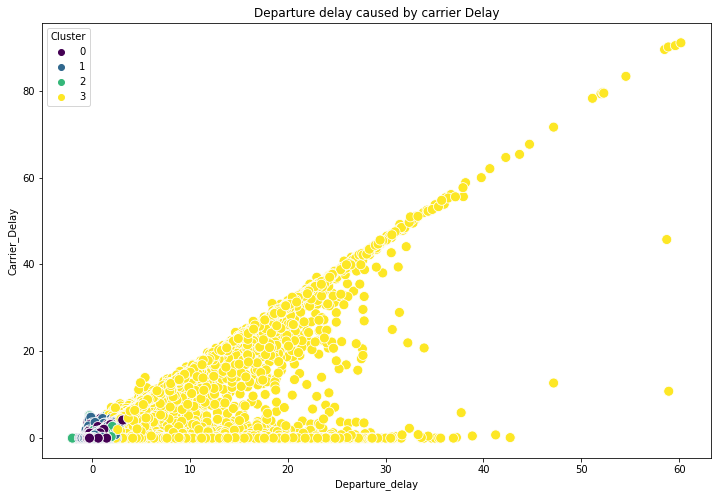

<Figure size 432x288 with 0 Axes>

In [25]:
# Plotting the clusters of Departure delay and carrier Delay
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_scaled, x='Departure_Delay', y='Carrier_Delay', hue='clusters', palette='viridis', s=100)
plt.title('Departure delay caused by carrier Delay')
plt.xlabel('Departure_delay')
plt.ylabel('Carrier_Delay')
plt.legend(title='Cluster')
plt.show()

# Export the scatterplot of clusters
file_name = os.path.join(path, '04 Analysis', 'Visualizations', 'Departure_carrier_delay_clustering.png')
plt.savefig(file_name)

### 5. Descriptive statistics for clusters

In [27]:
# Descriptive stats for clusters
cluster_stats = df_scaled.groupby('clusters').agg(['count', 'mean', 'std', 'min', 'max'])
print(cluster_stats)

         Scheduled_Departure_Time                                          \
                            count      mean       std       min       max   
clusters                                                                    
0                         1232137 -0.804539  0.626389 -2.729423  2.127598   
1                         1185314  0.817081  0.518810 -1.227825  2.127598   
2                          441694  0.011470  1.030115 -2.729423  2.127598   
3                           60913  0.291216  0.948218 -2.721184  2.127598   

         Actual_Departure_Time                                          ...  \
                         count      mean       std       min       max  ...   
clusters                                                                ...   
0                      1232137 -0.802176  0.615437 -2.661179  2.143789  ...   
1                      1185314  0.813286  0.511468 -2.659176  2.143789  ...   
2                       441694 -0.015647  1.024912 -2.661179  2.1

The results from the k-means clustering analysis on the flight delay dataset can provide valuable insights and serve as a foundation for various future steps in an analytics pipeline. Such as:
Develop models to predict delays based on identified patterns.
Simulate various operational scenarios using the clusters to understand the potential impact of different interventions on delay reduction.
Develop interactive dashboards to visualize cluster insights and predictive model outputs, enabling stakeholders to make informed decisions quickly.

In [28]:
# Export the dataframe

df_scaled.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'clustered_flight_data.csv'), index=False)